<a href="https://colab.research.google.com/github/PoliNemkova/conflict_prediction_2025/blob/main/%5B1%5D_GDELT_articles_scrapping_Ukraine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Housekeeping

In [ ]:
!pip install gdelt
#!pip install newspaper
!pip install git+https://github.com/codelucas/newspaper.git
!pip install lxml_html_clean
!pip install geopandas
!pip install ipython-autotime
!pip install fiona
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 913.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.4/787.4 kB 8.1 MB/s eta 0:00:00
  Cloning https://github.com/codelucas/newspaper.git to /tmp/pip-req-build-w11bhm_8
  Running command git clone --filter=blob:none --quiet https://github.com/codelucas/newspaper.git /tmp/pip-req-build-w11bhm_8
  Resolved https://github.com/codelucas/newspaper.git to commit f622011177f6c2e95e48d6076561e21c016f08c3
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 8.7 MB/s eta 0:00:00
  

In [ ]:
from google.colab import drive  # to mount Drive to Colab notebook
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 1min 48s (started: 2024-11-18 19:44:55 +00:00)


In [ ]:
import gdelt, time
import pandas as pd
import geopandas
from datetime import datetime, timedelta
import contextlib
import io

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)

gd = gdelt.gdelt()

here
time: 1.09 s (started: 2024-11-18 19:46:44 +00:00)


#### Fetching the query

In [ ]:
'''
# Recording the time for processing this cell
start_time = time.time()

# Initialize the GDELT client
gdelt_client = gdelt.gdelt(version=2)

# Start date
start_date = datetime(2022, 1, 1)

# End date (30 days from the start date)
#end_date = start_date + timedelta(days=30)
end_date = datetime(2024, 1, 1)

# Initialize an empty DataFrame to store the concatenated data
all_events = pd.DataFrame()

# Desired country codes
#COUNTRY_CODES = ['SU', 'OD', 'ET', 'ER', 'DJ', 'SO', 'UG', 'KE']
COUNTRY_CODES = ['UKR']

# Desired CAMEO codes
#CAMEO_CODES = ['11','14','15','17','18','19','20'] # since GDELT is already focusing on news articles and media reports that cover events related to politics, conflict, and social issues


# Loop through each day and fetch data
current_date = start_date
while current_date <= end_date:
    # Convert current date to string format
    #current_date_str = current_date.strftime('%Y %b %d')
    current_date_str = current_date.strftime('%Y%m%d')


    # Search for events on the current date
    missing_dates = []
    try:
        with contextlib.redirect_stdout(io.StringIO()):
          events = gdelt_client.Search([current_date_str], table='events', output='gpd', normcols=True, coverage=False)
          #print('hi')
    except:
        missing_dates.append(current_date_str)
        #print('not hi')

    # Filter events based on country codes
    filtered_events = events[
        (events['actor1geocountrycode'].isin(COUNTRY_CODES)) |
        (events['actor1countrycode'].isin(COUNTRY_CODES)) |
        (events['actor2geocountrycode'].isin(COUNTRY_CODES)) |
        (events['actor2countrycode'].isin(COUNTRY_CODES)) |
        (events['actiongeocountrycode'].isin(COUNTRY_CODES)) &
        (events['sqldate'] >= 20220101) & (events['sqldate'] <= 20240101)
        #&&
        #(events['eventcode'].isin(CAMEO_CODES))
    ]

    # Concatenate the filtered events data to the all_events DataFrame
    all_events = pd.concat([all_events, filtered_events], ignore_index=True)

    # Move to the next day
    current_date += timedelta(days=1)

# Save the concatenated filtered data to a single CSV file
all_events.to_csv('filtered_events_ukraine.csv', index=False)



#DATABASE_NAME = 'horn_africa_forecast'
#GDELT_EVENTS = 'gdelt_events'
#all_events['geometry'] = all_events['geometry'].astype(str)
#s = spark.createDataFrame(all_events)
#s.write.mode('overwrite').format('delta').saveAsTable("{}.{}".format(DATABASE_NAME, GDELT_EVENTS))


all_events.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Ukraine_events_year2022-23.csv')
end_time = time.time()


# Print info
print('====> Finished processing after:', round((end_time - start_time) / 60, 2), 'minutes.')
print('GDELT querying complete at: ', current_time, '\n')
print('Length of the fetched file: ', len(all_events))
'''

In [ ]:
# load data if no need to re-queriyng
'''
all_events = pd.read_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_events_year2023.csv')
texts = pd.read_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_year2023_gdelt_articles_texts.csv')
'''

time: 789 ms (started: 2024-11-12 15:35:31 +00:00)


In [ ]:
from datetime import datetime, timedelta
import pandas as pd
import gdelt
import contextlib
import io

start_time = time.time()

# Initialize the GDELT client
gdelt_client = gdelt.gdelt(version=2)

# Define start and end dates for 2023
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)

# Initialize an empty DataFrame
all_events = pd.DataFrame()

# Set desired country codes for filtering
COUNTRY_CODES = ['UKR']

# Loop through each month
current_date = start_date
while current_date < end_date:
    next_month = current_date + timedelta(days=30)  # Approximate monthly step
    current_date_str = current_date.strftime('%Y%m%d')
    next_month_str = next_month.strftime('%Y%m%d')

    try:
        # Query for events within the month
        with contextlib.redirect_stdout(io.StringIO()):
            events = gdelt_client.Search(
                [current_date_str, next_month_str],
                table='events',
                output='gpd',
                normcols=True,
                coverage=False
            )
    except:
        print(f"Data missing for month starting on {current_date_str}")
        current_date = next_month
        continue

    # Filter for Sudan events
    filtered_events = events[
        (events['actor1geocountrycode'].isin(COUNTRY_CODES)) |
        (events['actor1countrycode'].isin(COUNTRY_CODES)) |
        (events['actor2geocountrycode'].isin(COUNTRY_CODES)) |
        (events['actor2countrycode'].isin(COUNTRY_CODES)) |
        (events['actiongeocountrycode'].isin(COUNTRY_CODES))
    ]

    # Concatenate filtered events to the main DataFrame
    all_events = pd.concat([all_events, filtered_events], ignore_index=True)

    # Advance to the next month
    current_date = next_month

# Save data to CSV
all_events.to_csv('Ukraine_events_year2022.csv', index=False)

all_events.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Ukraine_events_year2022-23.csv')
end_time = time.time()

# Print info
print('====> Finished processing after:', round((end_time - start_time) / 60, 2), 'minutes.')
print('GDELT querying complete at: ', current_time, '\n')
print('Length of the fetched file: ', len(all_events))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>'

====> Finished processing after: 0.28 minutes.
GDELT querying complete at:  19:46:45 

Length of the fetched file:  17202
time: 17.1 s (started: 2024-11-18 20:04:24 +00:00)


In [ ]:
len(all_events)

17202

time: 2.42 ms (started: 2024-11-18 20:07:04 +00:00)


In [ ]:
all_events['globaleventid'].nunique()

16591

time: 3.9 ms (started: 2024-11-18 20:07:12 +00:00)


In [ ]:
# Identify duplicates based on 'globaleventid'
duplicate_rows = all_events[all_events['globaleventid'].duplicated(keep=False)]

#duplicate_rows

In [ ]:
len(all_events)

17202

time: 2.61 ms (started: 2024-11-18 20:07:24 +00:00)


In [ ]:
len(duplicate_rows)

1222

time: 2.32 ms (started: 2024-11-18 20:07:29 +00:00)


In [ ]:
all_events.drop_duplicates(subset='globaleventid', keep='first', inplace=True)

time: 23.9 ms (started: 2024-11-18 20:07:33 +00:00)


In [ ]:
len(all_events)

16591

time: 2.91 ms (started: 2024-11-18 20:07:36 +00:00)


In [ ]:
all_events['year'].unique()

array([2022, 2021, 2012, 2023])

time: 3.57 ms (started: 2024-11-18 20:07:49 +00:00)


In [ ]:
all_events['year'].value_counts()

,count
year,
2022,15669
2023,864
2021,56
2012,2


time: 5.05 ms (started: 2024-11-18 20:08:07 +00:00)


In [ ]:
len(all_events[all_events['year']==2022])

15669

time: 23.5 ms (started: 2024-11-18 20:09:50 +00:00)


In [ ]:
# remove other years

all_events = all_events[all_events['year']==2022]

time: 17.2 ms (started: 2024-11-18 20:10:26 +00:00)


In [ ]:
all_events['actiongeoadm1code'].nunique()

430

time: 4.24 ms (started: 2024-11-18 20:10:29 +00:00)


In [ ]:
print(all_events['actiongeoadm1code'].unique())

['UP' 'UP12' 'RS48' 'RS' 'ZA' 'IN07' 'IR' 'PL' 'BO' 'UP00' 'US' 'BE11'
 'BR' 'USDC' 'SZ07' 'VE' 'UP07' 'TI' 'FR00' 'UKN7' 'IR26' 'UP02' 'AF'
 'RS66' 'TU68' 'USIL' 'UP11' 'CA' 'GM' 'UKH9' 'UK' 'EZ' 'UP14' 'UK00'
 'GM16' 'USGA' 'USNY' 'EN' 'UP15' 'CA01' 'CH' 'TW' 'AS' 'UKE4' 'FR' 'UP17'
 'OS00' 'UKR2' 'LG' 'BO00' 'UP27' 'AE' 'USCA' 'GG00' 'USWY' 'USOH' 'USPA'
 'RS23' 'RS61' 'RS06' 'UP06' 'KS' 'AC' 'USUT' 'CA11' 'CA08' 'GM02' 'PL80'
 'EI' 'KU' 'TU' 'EN01' 'LH' 'RS76' 'PL67' 'AF13' 'USNE' 'UP04' 'UP13' 'IS'
 'USTX' 'UP19' 'LH65' 'USMA' 'AS02' 'FI' 'NZ' 'IZ' 'RS00' 'GR' 'NO' 'RO'
 'UKC3' 'RS53' 'JA40' 'UP21' 'USSD' 'USRI' 'IT' 'USNJ' 'USNC' 'USIA'
 'CH22' 'USDE' 'AS01' 'NL07' 'BU40' 'IT07' 'CE34' 'UP08' 'UP26' 'USLA'
 'USCO' 'RS84' 'USKS' 'BE' 'SP56' 'RS07' 'TN' 'UP01' 'BU' 'RS38' 'UP03'
 'USWI' 'IN' 'CH12' 'MY14' 'SN' 'USFL' 'USOK' 'USAK' 'RS55' 'USWA' 'USTN'
 'HA' 'LE' 'TS' 'EG06' 'USAZ' 'USKY' 'UP05' 'TH' 'HU' 'UKE2' 'USVA' 'RS72'
 'HU05' 'UP22' 'RPD9' 'QA' 'EI07' 'SZ25' 'NL' 'IS00' 'UP0

In [ ]:
# Sudan has just 18 states, hence the other admin1s were from differet countries. Do we want to keep them?

SU_ADM1 = ['SU', 'SU42', 'SU29', 'SU47', 'SU43', 'SU50', 'SU41', 'SU36', 'SU53', 'SU56', 'SU49', 'SU39', 'SU52', 'SU38', 'SU55']
len(SU_ADM1)

15

time: 2.5 ms (started: 2024-11-08 02:03:57 +00:00)


In [ ]:
all_events['sqldate'].max()

20221231

time: 2.85 ms (started: 2024-11-18 20:10:58 +00:00)


In [ ]:
all_events.columns

Index(['globaleventid', 'sqldate', 'monthyear', 'year', 'fractiondate',
       'actor1code', 'actor1name', 'actor1countrycode', 'actor1knowngroupcode',
       'actor1ethniccode', 'actor1religion1code', 'actor1religion2code',
       'actor1type1code', 'actor1type2code', 'actor1type3code', 'actor2code',
       'actor2name', 'actor2countrycode', 'actor2knowngroupcode',
       'actor2ethniccode', 'actor2religion1code', 'actor2religion2code',
       'actor2type1code', 'actor2type2code', 'actor2type3code', 'isrootevent',
       'eventcode', 'cameocodedescription', 'eventbasecode', 'eventrootcode',
       'quadclass', 'goldsteinscale', 'nummentions', 'numsources',
       'numarticles', 'avgtone', 'actor1geotype', 'actor1geofullname',
       'actor1geocountrycode', 'actor1geoadm1code', 'actor1geoadm2code',
       'actor1geolat', 'actor1geolong', 'actor1geofeatureid', 'actor2geotype',
       'actor2geofullname', 'actor2geocountrycode', 'actor2geoadm1code',
       'actor2geoadm2code', 'actor2geo

time: 2.91 ms (started: 2024-11-08 02:03:57 +00:00)


In [ ]:
all_events['sourceurl'].iloc[69]

'https://www.sott.net/article/462634-Serious-substantive-Biden-Putin-agree-to-intensify-diplomacy-amid-Ukraine-tensions'

time: 3.02 ms (started: 2024-11-18 20:11:06 +00:00)


In [ ]:
all_events['sourceurl'].isna().value_counts()

,count
sourceurl,
False,15669


time: 7.87 ms (started: 2024-11-18 20:11:12 +00:00)


In [ ]:
all_events = all_events.reset_index()

time: 2.5 ms (started: 2024-11-12 16:34:20 +00:00)


In [ ]:
len(all_events)

15669

time: 2.7 ms (started: 2024-11-18 20:11:23 +00:00)


In [ ]:
all_events['globaleventid'].nunique()

15669

time: 3.83 ms (started: 2024-11-18 20:11:29 +00:00)


### scrapping

In [ ]:
all_events = all_events.reset_index()

time: 43 ms (started: 2024-11-18 20:25:52 +00:00)


In [ ]:
# scrapping

# Recording the time for processing this cell
start_time = time.time()

from newspaper import Article

articles = []
ids = []
dates = []
for i in range(len(all_events)):
    url = all_events['sourceurl'][i]
    id = all_events['globaleventid'][i]
    date = all_events['sqldate'][i]
    article = Article(url)
    try:
        article.download()
        article.parse()
        article_text = article.text
        articles.append(article_text)
        ids.append(id)
        dates.append(date)
    except:
        continue

texts = pd.DataFrame(zip(dates, ids, articles))

texts.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Ukraine_year2022_gdelt_articles_texts.csv')


# Print info
end_time = time.time()
print('====> Finished processing after:', round((end_time - start_time) / 60, 2), 'minutes.')
print('GDELT querying complete at: ', current_time, '\n')
print('Number of scrapped articles: ', len(texts), 'comparing to total events length: ', len(all_events))

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


====> Finished processing after: 152.59 minutes.
GDELT querying complete at:  19:46:45 

Number of scrapped articles:  12373 comparing to total events length:  15669
time: 2h 32min 35s (started: 2024-11-18 20:25:54 +00:00)


In [ ]:
# check whether events were duplicated
texts[1].nunique()

12373

time: 3.49 ms (started: 2024-11-18 23:00:08 +00:00)


In [ ]:
# check how many articles were unique
texts[2].nunique()

2400

time: 146 ms (started: 2024-11-18 23:00:14 +00:00)


In [ ]:
# texts = pd.read_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_year2023_gdelt_articles_texts.csv')
texts

,0,1,2
0,20220112,1022987024,"A few weeks ago, Jan. 6 committee member Rep. ..."
1,20220112,1022987025,Following an intense round of NATO-Russia talk...
2,20220112,1022987026,Following an intense round of NATO-Russia talk...
3,20220112,1022987027,Following an intense round of NATO-Russia talk...
4,20220112,1022987028,Many humanitarian crises get little media atte...
...,...,...,...
12368,20220117,1080610203,Russian Foreign Minister Sergei Lavrov deliver...
12369,20220117,1080610211,Russian Foreign Minister Sergei Lavrov deliver...
12370,20220117,1080610212,Russian Foreign Minister Sergei Lavrov deliver...
12371,20220123,1081511086,Energy Secretary Jennifer Granholm said Monday...


time: 314 ms (started: 2024-11-18 23:00:23 +00:00)


In [ ]:
(texts[2].str.len() < 100).sum()

1756

time: 10.7 ms (started: 2024-11-18 23:00:38 +00:00)


In [ ]:
# Drop rows where the length of text in column 1 is less than 100 characters
texts = texts[texts[2].str.len() >= 100].reset_index(drop=True)

time: 9.47 ms (started: 2024-11-18 23:00:47 +00:00)


In [ ]:
texts[2].nunique()

2382

time: 75.1 ms (started: 2024-11-18 23:00:49 +00:00)


In [ ]:
texts.rename(columns={0: 'date', 1: 'globaleventid', 2: 'text'}, inplace=True)
ukraine_2022 = pd.merge(all_events, texts[['globaleventid', 'text']], on='globaleventid', how='left')
len(ukraine_2022)

15669

time: 38.8 ms (started: 2024-11-18 23:01:08 +00:00)


In [ ]:
ukraine_2022['globaleventid'].nunique()

15669

time: 3.46 ms (started: 2024-11-18 23:01:15 +00:00)


In [ ]:
# Convert 'sqldate' column to datetime if necessary
#sudan_2023['sqldate'] = pd.to_datetime(sudan_2023['sqldate'], errors='coerce')

# Sort the DataFrame by 'sqldate'
ukraine_2022 = ukraine_2022.sort_values(by='sqldate')
#ukraine_2022 = ukraine_2022.drop(columns=['level_0', 'index', 'Unnamed: 0'])
ukraine_2022 = ukraine_2022.reset_index()

time: 64.3 ms (started: 2024-11-18 23:01:44 +00:00)


In [ ]:
len(ukraine_2022)

15669

time: 2.61 ms (started: 2024-11-18 23:01:48 +00:00)


In [ ]:
# Ensure that 'sqldate' is treated as a string or a datetime type
ukraine_2022['sqldate'] = pd.to_datetime(ukraine_2022['sqldate'], format='%Y%m%d')

# Filter the DataFrame based on the date
sudan_2023 = ukraine_2022[ukraine_2022['sqldate'] >= '2023-01-01']

# Check the length of the filtered DataFrame
len(ukraine_2022)

15669

time: 9.79 ms (started: 2024-11-18 23:02:04 +00:00)


In [ ]:
ukraine_2022.iloc[50:60]

,level_0,index,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,...,actiongeocountrycode,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text
50,66,76,1021839944,2022-01-04,202201,2022,2022.0110,UKR,UKRAINE,UKR,...,RS,RS,NaN,60.0000,100.00000,RS,20220104234500,https://www.economist.com/europe/ukrainians-ar...,POINT (100 60),I N THE SNOW-BLANKETED town of Vovchansk in ea...
51,67,77,1021839945,2022-01-04,202201,2022,2022.0110,UKR,UKRAINIAN,UKR,...,UP,UP07,25036,50.2908,36.94110,-1058557,20220104234500,https://www.economist.com/europe/ukrainians-ar...,POINT (36.9411 50.2908),I N THE SNOW-BLANKETED town of Vovchansk in ea...
52,64,74,1021839942,2022-01-04,202201,2022,2022.0110,UKR,UKRAINE,UKR,...,UP,UP12,28554,50.4333,30.51670,-1044367,20220104234500,https://www.economist.com/europe/ukrainians-ar...,POINT (30.5167 50.4333),I N THE SNOW-BLANKETED town of Vovchansk in ea...
53,63,73,1021839941,2022-01-04,202201,2022,2022.0110,UKR,UKRAINIAN,UKR,...,UP,UP12,28554,50.4333,30.51670,-1044367,20220104234500,https://www.economist.com/europe/ukrainians-ar...,POINT (30.5167 50.4333),I N THE SNOW-BLANKETED town of Vovchansk in ea...
54,827,868,1026530591,2022-01-04,202201,2022,2022.0110,EUR,EUROPE,EUR,...,UP,UP,NaN,49.0000,32.00000,UP,20220203234500,https://www.kzyx.org/npr-news/2022-02-03/u-s-s...,POINT (32 49),The Biden administration on Thursday accused M...
55,114,124,1021994611,2022-01-05,202201,2022,2022.0137,UKR,UKRAINE,UKR,...,UK,UKN7,40133,51.2500,-0.65000,-2604192,20220105234500,https://www.cnsnews.com/index.php/article/inte...,POINT (-0.65 51.25),NaN
56,98,108,1021994163,2022-01-05,202201,2022,2022.0137,GBR,UNITED KINGDOM,GBR,...,FR,FR00,16282,48.8667,2.33333,-1456928,20220105234500,https://www.cnsnews.com/index.php/article/inte...,POINT (2.33333 48.8667),NaN
57,90,100,1021994051,2022-01-05,202201,2022,2022.0137,DEU,GERMANY,DEU,...,UK,UKN7,40133,51.2500,-0.65000,-2604192,20220105234500,https://www.cnsnews.com/index.php/article/inte...,POINT (-0.65 51.25),NaN
58,108,118,1021994605,2022-01-05,202201,2022,2022.0137,UKR,UKRAINE,UKR,...,RS,RS48,25106,55.7522,37.61560,-2960561,20220105234500,https://www.cnsnews.com/index.php/article/inte...,POINT (37.6156 55.7522),NaN
59,97,107,1021994162,2022-01-05,202201,2022,2022.0137,GBR,UNITED KINGDOM,GBR,...,FR,FR00,16282,48.8667,2.33333,-1456928,20220105234500,https://www.cnsnews.com/index.php/article/inte...,POINT (2.33333 48.8667),NaN


time: 21.5 ms (started: 2024-11-18 23:02:08 +00:00)


In [ ]:
ukraine_2022 = ukraine_2022.dropna(subset=['text'])
len(ukraine_2022)

10617

time: 26.6 ms (started: 2024-11-18 23:02:37 +00:00)


### encodings

In [ ]:
# encoddings

!pip install transformers sentence-transformers torch

from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from sentence_transformers import SentenceTransformer, util
import torch

# Load the pre-trained SimCSE model
model_name = 'princeton-nlp/sup-simcse-bert-base-uncased'
model = SentenceTransformer(model_name)


articles = ukraine_2022['text'].to_list()

# Encode the articles
embeddings = model.encode(articles)


print("Embeddings shape:", embeddings.shape)

ukraine_2022['embeddings'] = list(embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Embeddings shape: (10617, 768)
time: 1min 28s (started: 2024-11-18 23:02:58 +00:00)


In [ ]:
ukraine_2022['embeddings'] = list(embeddings)

time: 4.64 ms (started: 2024-11-18 23:04:42 +00:00)


In [ ]:
ukraine_2022.head(10)

,level_0,index,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,...,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,embeddings
4,78,88,1021495150,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,UKR,...,UP,NaN,49.0000,32.0000,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,"[-0.20447735, 0.39935204, 0.30754054, -0.28697..."
6,75,85,1021495140,2022-01-01,202201,2022,2022.0027,TJK,TAJIKISTAN,TJK,...,TI,NaN,39.0000,71.0000,TI,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (71 39),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,"[-0.20447735, 0.39935204, 0.30754054, -0.28697..."
7,79,89,1021495151,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,UKR,...,UP,NaN,49.0000,32.0000,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,"[-0.20447735, 0.39935204, 0.30754054, -0.28697..."
8,76,86,1021495148,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,UKR,...,UP,NaN,49.0000,32.0000,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,"[-0.20447735, 0.39935204, 0.30754054, -0.28697..."
9,74,84,1021495139,2022-01-01,202201,2022,2022.0027,TJK,TAJIKISTAN,TJK,...,UP,NaN,49.0000,32.0000,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,"[-0.20447735, 0.39935204, 0.30754054, -0.28697..."
10,73,83,1021495138,2022-01-01,202201,2022,2022.0027,TJK,TAJIKISTAN,TJK,...,TI,NaN,39.0000,71.0000,TI,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (71 39),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,"[-0.20447735, 0.39935204, 0.30754054, -0.28697..."
11,77,87,1021495149,2022-01-01,202201,2022,2022.0027,UKR,UKRAINE,UKR,...,UP,NaN,49.0000,32.0000,UP,20220101234500,https://menafn.com/1103470407/Ukraine-Tajikist...,POINT (32 49),(MENAFN- UkrinForm) Ukraine's Deputy Foreign D...,"[-0.20447735, 0.39935204, 0.30754054, -0.28697..."
17,46,56,1021574010,2022-01-02,202201,2022,2022.0055,UKR,UKRAINIAN,UKR,...,UP12,28554,50.4333,30.5167,-1044367,20220102234500,https://www.rferl.org/a/ukraine-russia-biden-z...,POINT (30.5167 50.4333),U.S. President Joe Biden has told Ukrainian Pr...,"[-0.25150448, -0.11480924, 0.3679359, -0.31526..."
18,48,58,1021574012,2022-01-02,202201,2022,2022.0055,UKR,UKRAINE,UKR,...,UP00,25090,48.5000,38.5000,-1038077,20220102234500,https://news.webindia123.com/news/Articles/Wor...,POINT (38.5 48.5),US President Joe Biden on Sunday (local time) ...,"[-0.18373328, -0.15169255, 0.3066362, -0.35751..."
19,45,55,1021574009,2022-01-02,202201,2022,2022.0055,UKR,UKRAINE,UKR,...,RS48,25106,55.7522,37.6156,-2960561,20220102234500,https://news.webindia123.com/news/Articles/Wor...,POINT (37.6156 55.7522),US President Joe Biden on Sunday (local time) ...,"[-0.18373328, -0.15169255, 0.3066362, -0.35751..."


time: 30.4 ms (started: 2024-11-18 23:04:43 +00:00)


In [ ]:
ukraine_2022.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/Fall 2024/ukraine_2022_events+text+enc.csv')

time: 53.8 s (started: 2024-11-18 23:04:56 +00:00)


## all the rest was moved to a separate notebook: https://colab.research.google.com/drive/1hLCcNN-iU-V3DwsPv6KYlj390GM-eNYA?usp=sharing

In [ ]:
# Calculate cosine similarity between articles

similarities = util.cos_sim(embeddings, embeddings)
print("Cosine Similarity Matrix:")
print(similarities)


Cosine Similarity Matrix:
tensor([[1.0000, 1.0000, 1.0000,  ..., 0.8025, 0.8025, 0.8025],
        [1.0000, 1.0000, 1.0000,  ..., 0.8025, 0.8025, 0.8025],
        [1.0000, 1.0000, 1.0000,  ..., 0.8025, 0.8025, 0.8025],
        ...,
        [0.8025, 0.8025, 0.8025,  ..., 1.0000, 1.0000, 1.0000],
        [0.8025, 0.8025, 0.8025,  ..., 1.0000, 1.0000, 1.0000],
        [0.8025, 0.8025, 0.8025,  ..., 1.0000, 1.0000, 1.0000]])
time: 392 ms (started: 2024-11-18 23:09:01 +00:00)


KeyboardInterrupt: 

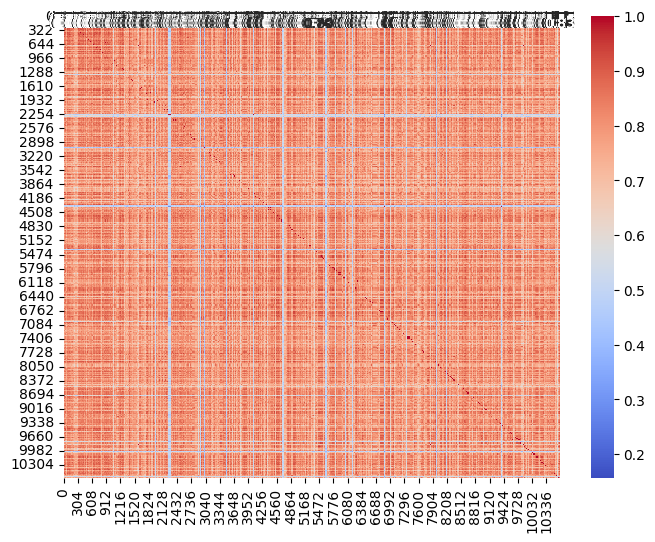

time: 58min 34s (started: 2024-11-18 23:09:06 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the tensor to a numpy array (if it's still a tensor)
similarities = similarities.cpu().numpy()

plt.figure(figsize=(8, 6))
sns.heatmap(similarities, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cosine Similarity Matrix")
plt.xlabel("Article Index")
plt.ylabel("Article Index")
plt.show()


###### trying clustering

In [ ]:
!pip install scikit-learn matplotlib seaborn

time: 2.52 s (started: 2024-11-08 03:36:34 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ensure embeddings is a NumPy array
embeddings = np.array(embeddings)

# Check the shape of the embeddings
print(f"Embeddings shape: {embeddings.shape}")


Embeddings shape: (15, 768)
time: 513 ms (started: 2024-11-08 03:37:02 +00:00)


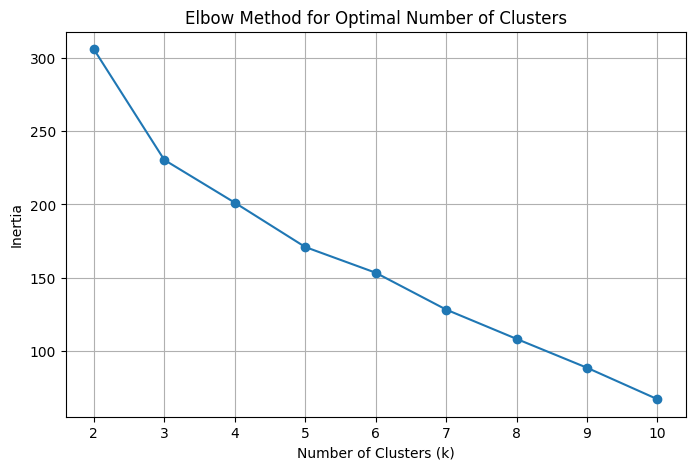

time: 253 ms (started: 2024-11-08 03:37:14 +00:00)


In [ ]:
# Elbow method to find the optimal number of clusters
inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# Perform K-means clustering with the chosen number of clusters
k = 5  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Add the cluster labels to your DataFrame
#sudan_w_acled['cluster'] = clusters


time: 5.76 ms (started: 2024-11-08 03:39:46 +00:00)


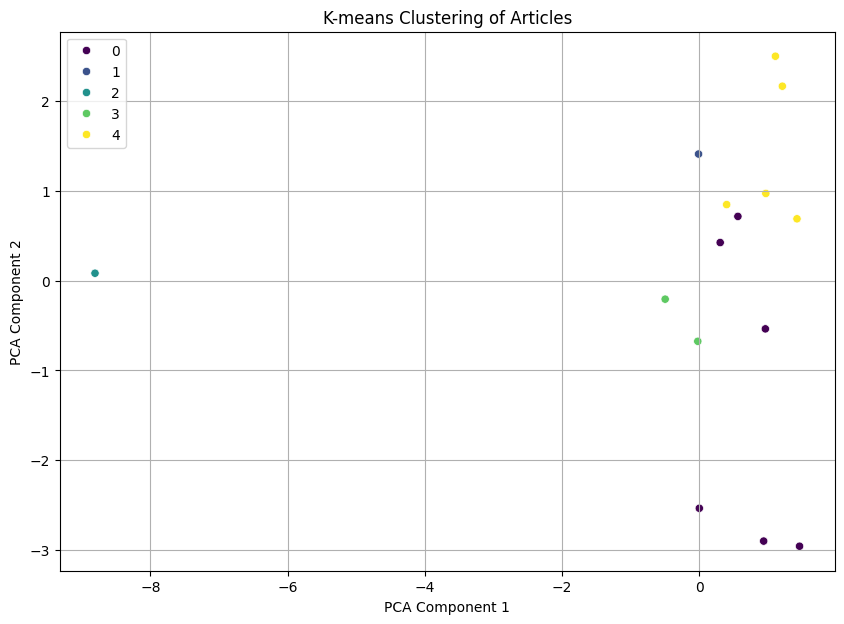

time: 241 ms (started: 2024-11-08 03:39:48 +00:00)


In [ ]:
from sklearn.decomposition import PCA

# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    hue=clusters,
    palette='viridis',
    legend='full'
)
plt.title("K-means Clustering of Articles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
silhouette_avg = silhouette_score(embeddings, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.05
time: 3.64 ms (started: 2024-11-08 03:40:24 +00:00)


In [ ]:
from sklearn.metrics import silhouette_score

best_k = None
best_score = -1

for k in range(2, 11):  # Try different values for k
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, clusters)
    print(f"Silhouette Score for k={k}: {score:.2f}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"Best k: {best_k} with a Silhouette Score of {best_score:.2f}")


Silhouette Score for k=2: 0.07
Silhouette Score for k=3: 0.04
Silhouette Score for k=4: 0.04
Silhouette Score for k=5: 0.05
Silhouette Score for k=6: 0.04
Silhouette Score for k=7: 0.05
Silhouette Score for k=8: 0.02
Silhouette Score for k=9: 0.04
Silhouette Score for k=10: 0.05
Best k: 2 with a Silhouette Score of 0.07
time: 65.6 ms (started: 2024-11-08 03:42:30 +00:00)


In [ ]:
sudan_2023.to_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/GDELT Articles Scrapped/Sudan_2023_gdelt_articles_merged.csv')

time: 420 ms (started: 2024-11-08 02:50:33 +00:00)


#### loading ACLED features

In [ ]:
# loading ACLED
acled = pd.read_csv('/content/gdrive/My Drive/CONFLICT PREDICTION/Fall 2024/acled_bin_all_countries_since_2015.csv')
acled.head(10)

,Country_Name_Short,sum(ACLED_Fatalities),STARTDATE,ENDDATE,abs_change,pct_increase,bin_esc_30
0,Afghanistan,271,2020-01-13,2020-01-20,-1478.0,-8.450543e+01,0
1,Afghanistan,796,2020-09-14,2020-09-21,525.0,1.937269e+02,1
2,Afghanistan,17,2022-12-12,2022-12-19,-779.0,-9.786432e+01,0
3,Afghanistan,17,2023-04-17,2023-04-24,0.0,0.000000e+00,0
4,Afghanistan,14,2023-05-15,2023-05-22,-3.0,-1.764706e+01,0
5,Albania,0,2021-06-14,2021-06-21,0.0,0.000000e+00,0
6,Albania,0,2019-01-07,2019-01-14,0.0,0.000000e+00,0
7,Albania,0,2020-08-31,2020-09-07,0.0,0.000000e+00,0
8,Algeria,0,2018-09-24,2018-10-01,0.0,0.000000e+00,0
9,Algeria,1,2020-05-18,2020-05-25,1.0,1.000000e+12,1


time: 890 ms (started: 2024-11-08 01:58:31 +00:00)


In [ ]:
len(acled[acled['Country_Name_Short']=='Sudan'])

507

time: 8.55 ms (started: 2024-11-08 02:00:17 +00:00)


In [ ]:
acled_sudan = acled[acled['Country_Name_Short']=='Sudan']
acled_sudan

,Country_Name_Short,sum(ACLED_Fatalities),STARTDATE,ENDDATE,abs_change,pct_increase,bin_esc_30
121,Sudan,15,2022-05-09,2022-05-16,12.0,400.000000,1
122,Sudan,135,2016-03-07,2016-03-14,120.0,800.000000,1
371,Sudan,66,2020-06-01,2020-06-08,-69.0,-51.111111,0
372,Sudan,16,2016-06-06,2016-06-13,-50.0,-75.757576,0
373,Sudan,16,2023-01-09,2023-01-16,0.0,0.000000,0
...,...,...,...,...,...,...,...
54111,Sudan,8,2021-01-04,2021-01-11,6.0,300.000000,1
54370,Sudan,48,2015-05-18,2015-05-25,40.0,500.000000,1
54371,Sudan,113,2015-04-20,2015-04-27,65.0,135.416667,1
54631,Sudan,1,2019-08-26,2019-09-02,-112.0,-99.115044,0


time: 19.8 ms (started: 2024-11-08 02:01:11 +00:00)


In [ ]:
# Step 1: Convert 'sqldate' to datetime
sudan_2023['sqldate'] = pd.to_datetime(sudan_2023['sqldate'], format='%Y%m%d')

# Step 2: Get the Monday of the week for each date
sudan_2023['week_start'] = sudan_2023['sqldate'] - pd.to_timedelta(sudan_2023['sqldate'].dt.weekday, unit='D')


time: 5.01 ms (started: 2024-11-08 02:21:00 +00:00)


In [ ]:
sudan_2023

,level_0,index,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,...,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,week_start
0,0,0,1078771985,2023-01-04,202301,2023,2023.0110,SDN,SUDANESE,SDN,...,SU,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,2023-01-02
1,1,1,1078772253,2023-01-04,202301,2023,2023.0110,USAGOV,US OFFICIAL,USA,...,SU,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,2023-01-02
2,7,7,1080099077,2023-01-13,202301,2023,2023.0356,IGOUNO,THE UN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,2023-01-09
3,8,8,1080099166,2023-01-13,202301,2023,2023.0356,MIL,MILITARY,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,2023-01-09
4,9,9,1080099234,2023-01-13,202301,2023,2023.0356,SDN,SUDAN,SDN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,2023-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,89,1092422424,2023-03-30,202303,2023,2023.2466,GOV,PRESIDENT,NaN,...,LY,NaN,25.00,17.0,LY,20230330234500,https://www.msn.com/en-xl/news/other/tsc-presi...,POINT (17 25),NaN,2023-03-27
86,86,90,1092422426,2023-03-30,202303,2023,2023.2466,GOV,PRESIDENT,NaN,...,LY,NaN,25.00,17.0,LY,20230330234500,https://www.msn.com/en-xl/news/other/tsc-presi...,POINT (17 25),NaN,2023-03-27
87,87,91,1092422491,2023-03-30,202303,2023,2023.2466,IGOUNO,UNITED NATIONS,NaN,...,LY,NaN,25.00,17.0,LY,20230330234500,https://www.msn.com/en-xl/news/other/tsc-presi...,POINT (17 25),NaN,2023-03-27
88,88,92,1092422493,2023-03-30,202303,2023,2023.2466,IGOUNO,UNITED NATIONS,NaN,...,LY,NaN,25.00,17.0,LY,20230330234500,https://www.msn.com/en-xl/news/other/tsc-presi...,POINT (17 25),NaN,2023-03-27


time: 23.3 ms (started: 2024-11-08 02:21:31 +00:00)


In [ ]:
# Filter rows based on the 'STARTDATE' column
len(acled_sudan[(acled_sudan['STARTDATE'] > '2023-01-01') & (acled_sudan['STARTDATE'] < '2023-12-31')])


52

time: 4.13 ms (started: 2024-11-08 02:36:14 +00:00)


In [ ]:

sudan_2023['week_start'] = pd.to_datetime(sudan_2023['week_start'])
acled_sudan['STARTDATE'] = pd.to_datetime(acled_sudan['STARTDATE'], errors='coerce')

# Perform the merge
sudan_w_acled = pd.merge(
    sudan_2023,
    acled_sudan,
    left_on='week_start',
    right_on='STARTDATE',
    how='left'
)


time: 8.03 ms (started: 2024-11-08 03:16:22 +00:00)


<ipython-input-80-51597d553b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_sudan['STARTDATE'] = pd.to_datetime(acled_sudan['STARTDATE'], errors='coerce')


In [ ]:
sudan_w_acled['globaleventid'].nunique()

90

time: 3.84 ms (started: 2024-11-08 02:36:53 +00:00)


In [ ]:
len(sudan_w_acled)

90

time: 2.62 ms (started: 2024-11-08 02:37:56 +00:00)


In [ ]:
sudan_w_acled.columns

Index(['level_0', 'index', 'globaleventid', 'sqldate', 'monthyear', 'year',
       'fractiondate', 'actor1code', 'actor1name', 'actor1countrycode',
       'actor1knowngroupcode', 'actor1ethniccode', 'actor1religion1code',
       'actor1religion2code', 'actor1type1code', 'actor1type2code',
       'actor1type3code', 'actor2code', 'actor2name', 'actor2countrycode',
       'actor2knowngroupcode', 'actor2ethniccode', 'actor2religion1code',
       'actor2religion2code', 'actor2type1code', 'actor2type2code',
       'actor2type3code', 'isrootevent', 'eventcode', 'cameocodedescription',
       'eventbasecode', 'eventrootcode', 'quadclass', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone', 'actor1geotype',
       'actor1geofullname', 'actor1geocountrycode', 'actor1geoadm1code',
       'actor1geoadm2code', 'actor1geolat', 'actor1geolong',
       'actor1geofeatureid', 'actor2geotype', 'actor2geofullname',
       'actor2geocountrycode', 'actor2geoadm1code', 'actor2geoa

time: 3.21 ms (started: 2024-11-08 03:16:31 +00:00)


In [ ]:
sudan_w_acled = sudan_w_acled.sort_values(by='sqldate')

time: 2.65 ms (started: 2024-11-08 02:56:49 +00:00)


In [ ]:
# Z-score Standardization

sudan_w_acled['normalized_fatalities'] = (sudan_w_acled['sum(ACLED_Fatalities)'] - sudan_w_acled['sum(ACLED_Fatalities)'].mean()) / sudan_w_acled['sum(ACLED_Fatalities)'].std()


time: 2.03 ms (started: 2024-11-08 03:17:24 +00:00)


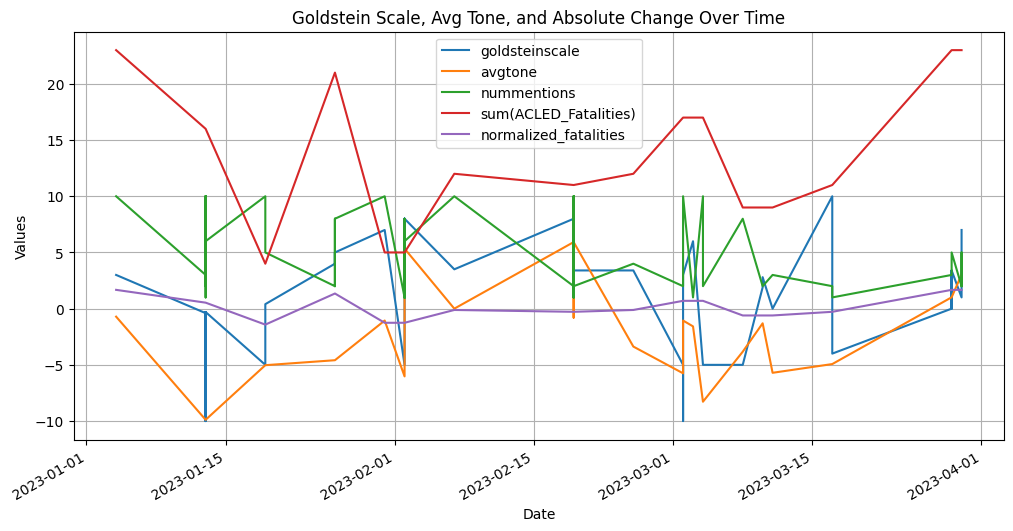

time: 311 ms (started: 2024-11-08 03:18:21 +00:00)


In [ ]:
import matplotlib.pyplot as plt

# Convert 'sqldate' to datetime if not already done
sudan_w_acled['sqldate'] = pd.to_datetime(sudan_w_acled['sqldate'])

# Set 'sqldate' as the index for better plotting
sudan_w_acled.set_index('sqldate', inplace=True)

# Plot the specified columns
sudan_w_acled[['goldsteinscale', 'avgtone', 'nummentions', 'sum(ACLED_Fatalities)', 'normalized_fatalities']].plot(figsize=(12, 6))
plt.title("Goldstein Scale, Avg Tone, and Absolute Change Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the correlation matrix
correlation_matrix = sudan_w_acled[['goldsteinscale', 'avgtone', 'normalized_fatalities']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                       goldsteinscale   avgtone  normalized_fatalities
goldsteinscale               1.000000  0.741077              -0.260677
avgtone                      0.741077  1.000000              -0.341744
normalized_fatalities       -0.260677 -0.341744               1.000000
time: 5.51 ms (started: 2024-11-08 03:20:38 +00:00)


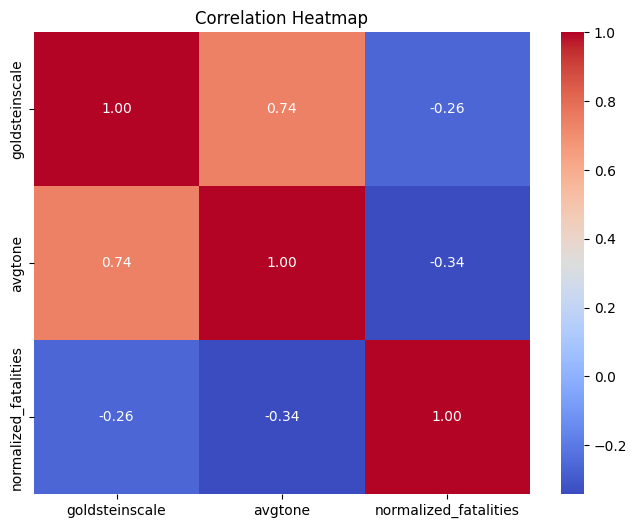

time: 194 ms (started: 2024-11-08 03:20:41 +00:00)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
